<a href="https://colab.research.google.com/github/Gauranga2022/Fun-with-Python/blob/main/Linear_Algebra_and_its_Applications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LU solver: Custom vs ScipyStats

Write a your own $LU$ solver, based on Gaussian elimination with partial pivoting, in Python. The input is a square invertible matrix $A$ and a right hand side vector $b$ (both randomly generated). The output should be $L$, $U $ and the (row) permutaion matrix and the solution to the problem $Ax = b$. Once you are sure that the code is working properly you should experiment with various sizes and note the time taken. Prepare comparison tables (one for factorization and the other for the solution, i.e., forward and backword substitution) that shows the time needed for your algorithm and also for the SciPy’s $LU$ solver. For each system you should also note down how far were you from the actual solution.

In [ ]:
pip install tabulate

In [ ]:
import numpy as np
import time
import random
from scipy.linalg import lu, lu_solve, lu_factor
import matplotlib.pyplot as plt
import pandas as pd
from tabulate import tabulate

## Code to finding PA = LU decomposition

In [ ]:
def GEPP(matA):                                       #The function computes The PA = LU factorisation of the matrix matA
  m = len(matA)
  U = matA                                            #A is a mxm matrix
  L = np.identity(m)                                  #L has been initialized to the identity matrix
  P = np.identity(m)                                  #P has been initialized to the identity matrix
  for k in range(m-1):
    max = 0
    for i in range(k, m):
      if np.abs(U[i][k])>max:
        max = np.abs(U[i][k])                         # find the abs max in the col in col[i:]
    if max == 0:
      return('unable to find nonzero pivot')          # if pivot is 0
    col = [np.abs(U[j][k]) for j in range(k, m)]
    index = k + col.index(max)
    i = index
    U[[k,i],k:m]= U[[i,k],k:m]                        #finding the pivot and exchange rows
    L[[k,i],:k] = L[[i,k],:k]                         #update L
    P[[k,i]]= P[[i,k]]                                #update P
    for j in range(k+1,m):
      L[j,k] = (float(U[j,k]))/U[k,k]
      for l in range(k,m):
        U[j,l] = U[j,l] - float(L[j,k])*U[k,l]
  return P, L, U

In [ ]:
GEPP(A)

(array([[0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [1., 0., 0., 0.]]),
 array([[ 1.        ,  0.        ,  0.        ,  0.        ],
        [ 1.        ,  1.        ,  0.        ,  0.        ],
        [ 0.25      , -0.14285714,  1.        ,  0.        ],
        [ 0.58333333, -0.28571429,  0.125     ,  1.        ]]),
 array([[12, 14,  8,  3],
        [ 0, -7,  6,  6],
        [ 0,  0,  8,  8],
        [ 0,  0,  0,  4]]))

## Solves a linear system of equations $Lx = b$ where the $L$ matrix is (unit) lower-triangular

In [ ]:
def forward_substitution(L, b):           # Solves a linear system of equations Lx = b where the L matrix is lower-triangular
    m = len(b)
    x = np.empty(m)
    for v in range(m):
        if L[v][v] == 0:                   # the value on the diagonal is zero
            x[v] = 0                       # the current variable's value is irrelevant
            continue                       # calculate v-th variable value
        value = b[v]                       # subtract linear combination of the already known variables
                                           # in the bottom left corner of the matrix
        for i in range(v):
            value -= L[v][i] * x[i]        # divide by the coefficient by the v-th variable to get it's value
        value /= L[v][v]                   # store the value in the resulting vector
        x[v] = value
    return x

## Solves a linear system of equations $Ux = b$ where the U matrix is upper-triangular

In [ ]:
def backward_substitution(U, b):                                                #Solves a linear system of equations Ux = b where the U matrix is upper-triangular
    m = len(b)
    x = np.empty(m)
    for v in range(m - 1, -1, -1):
        if U[v][v] == 0:                                                        # the value on the diagonal is zero
            x[v] = 0
            continue                                                            # calculate v-th variable value
        value = b[v]                                                            # subtract linear combination of the already known variables
                                                                                # in the top right corner of the matrix
        for i in range(v + 1, m, 1):
            value -= U[v][i] * x[i]                                             # divide by the coefficient before the i-th variable to get it's value
        value /= U[v][v]                                                        # store the value in the resulting vector
        x[v] = value
    return x

## $Ax=b$

In [ ]:
def PLU_solve(A, b):    #solves for Ax=b using PA=LU and forward and back substitution
    (P, L, U) = GEPP(A)
    b = np.matmul(P, b) # multiply matrix P with vector b
    y = forward_substitution(L, b)
    x = backward_substitution(U, y)
    return x

## Test case

Customised functions


In [ ]:
A = np.array(   [[2, 1, 1, 0],
                 [4, 3, 3, 1],
                 [8, 7, 9, 5],
                 [6, 7, 9, 8]], dtype = float)
A_copy = np.copy(A)
b = np.array([1,8/3, 7/2, 9/4], dtype = float)

In [ ]:
PLU_solve(A, b)

array([-0.0625    ,  1.91666667, -0.79166667, -0.45833333])

In [ ]:
np.matmul(A_copy,np.array([-0.0625    ,  1.91666667, -0.79166667, -0.45833333]))

array([1.        , 2.66666667, 3.50000001, 2.25000002])

Using ScipyStats

In [ ]:
lu_scipy, piv_scipy = lu_factor(A_copy)

In [ ]:
lu_scipy, piv_scipy

(array([[ 8.        ,  7.        ,  9.        ,  5.        ],
        [ 0.75      ,  1.75      ,  2.25      ,  4.25      ],
        [ 0.5       , -0.28571429, -0.85714286, -0.28571429],
        [ 0.25      , -0.42857143,  0.33333333,  0.66666667]]),
 array([2, 3, 3, 3], dtype=int32))

In [ ]:
x_scipy = lu_solve((lu_scipy, piv_scipy), b)

In [ ]:
x_scipy

array([-0.0625    ,  1.91666667, -0.79166667, -0.45833333])

## Time complexities

### Random Matrices

In [ ]:
sizes = [10, 50, 100, 500, 1000, 1500]
random.seed(42)
random_matrices = {}
for size in sizes:
    random_matrix = np.random.rand(size, size)
    random_matrices[size] = random_matrix
random_matrices1 = random_matrices.copy()

### Create 'b'

In [ ]:
random_arrays = {}
for size in sizes:
    random_array = np.random.rand(size)
    random_arrays[size] = random_array
random_arrays1 = random_arrays.copy()

In [ ]:
def PLU_solve_time(A, b):                   # Function to calculate elapsed times of GEPP, forward substitution, and backward substitution
    start_gepp = time.time()
    (P, L, U) = GEPP(A)
    elapsed_gepp = time.time() - start_gepp

    start_forward = time.time()
    b = np.matmul(P, b)
    y = forward_substitution(L, b)
    elapsed_forward = time.time() - start_forward

    start_backward = time.time()
    x = backward_substitution(U, y)
    elapsed_backward = time.time() - start_backward

    return elapsed_gepp, elapsed_forward, elapsed_backward

gepp_times = {}
forward_backward_times = {}

scipy_gepp_times = {}
scipy_forward_backward_times = {}

for size in sizes:
    A = random_matrices[size]
    b = random_arrays[size]

    # Timing for custom implementation
    elapsed_gepp, elapsed_forward, elapsed_backward = PLU_solve_time(A, b)
    gepp_times[size] = elapsed_gepp
    forward_backward_times[size] = elapsed_forward + elapsed_backward

    A = random_matrices1[size]
    b = random_arrays1[size]

    # Timing for scipy implementation
    start_scipy_gepp = time.time()
    lu_scipy, piv_scipy = lu_factor(A)
    elapsed_scipy_gepp = time.time() - start_scipy_gepp

    start_scipy_solve = time.time()
    x_scipy = lu_solve((lu_scipy, piv_scipy), b)
    elapsed_scipy_solve = time.time() - start_scipy_solve

    scipy_gepp_times[size] = elapsed_scipy_gepp
    scipy_forward_backward_times[size] = elapsed_scipy_solve

print("Time taken for GEPP for each size (Custom Implementation):", gepp_times)
print("Time taken for forward and backward substitution for each size (Custom Implementation):", forward_backward_times)

print("\nTime taken for GEPP for each size (Scipy Implementation):", scipy_gepp_times)
print("Time taken for lu_solve for each size (Scipy Implementation):", scipy_forward_backward_times)

Time taken for GEPP for each size (Custom Implementation): {10: 0.0016164779663085938, 50: 0.03986072540283203, 100: 0.2905542850494385, 500: 41.11908435821533, 1000: 308.2168400287628, 1500: 1032.3390114307404}
Time taken for forward and backward substitution for each size (Custom Implementation): {10: 0.0002105236053466797, 50: 0.0013427734375, 100: 0.01108860969543457, 500: 0.19768309593200684, 1000: 0.5423946380615234, 1500: 1.1061944961547852}

Time taken for GEPP for each size (Scipy Implementation): {10: 9.083747863769531e-05, 50: 0.00013136863708496094, 100: 0.0003726482391357422, 500: 0.009681463241577148, 1000: 0.039232730865478516, 1500: 0.10885071754455566}
Time taken for lu_solve for each size (Scipy Implementation): {10: 3.123283386230469e-05, 50: 2.9087066650390625e-05, 100: 8.678436279296875e-05, 500: 0.0002872943878173828, 1000: 0.0012631416320800781, 1500: 0.001981973648071289}


## GEPP and Forward+Backward time comparisons for my custom implementation vs SciPy Stats implementation (PLOT)

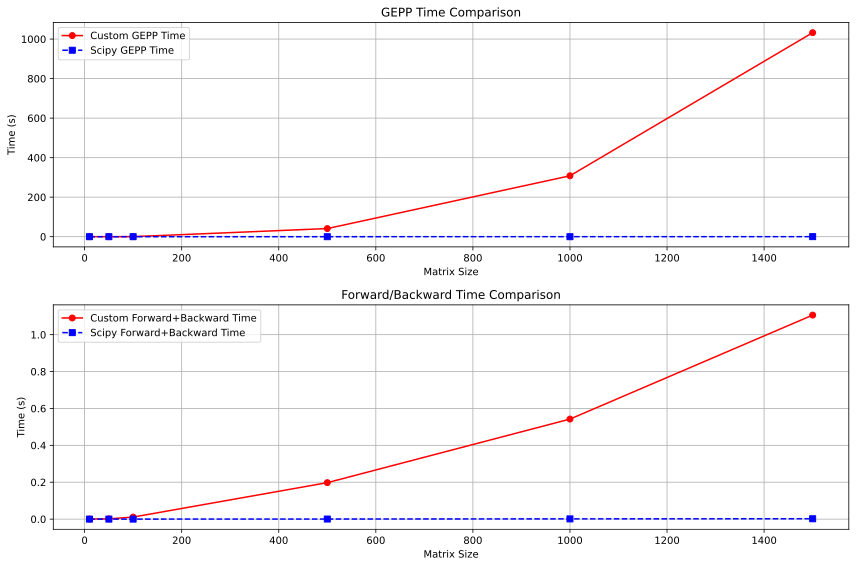

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(sizes, list(gepp_times.values()), marker='o', linestyle='-', label='Custom GEPP Time', color='red')
plt.plot(sizes, list(scipy_gepp_times.values()), marker='s', linestyle='--', label='Scipy GEPP Time', color='blue')
plt.title('GEPP Time Comparison')
plt.xlabel('Matrix Size')
plt.ylabel('Time (s)')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(sizes, list(forward_backward_times.values()), marker='o', linestyle='-', label='Custom Forward+Backward Time', color='red')
plt.plot(sizes, list(scipy_forward_backward_times.values()), marker='s', linestyle='--', label='Scipy Forward+Backward Time', color='blue')
plt.title('Forward/Backward Time Comparison')
plt.xlabel('Matrix Size')
plt.ylabel('Time (s)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## GEPP and Forward+Backward time comparisons for my custom implementation vs SciPy Stats implementation (Table)

In [ ]:
custom_data = {'Size': sizes, 'GEPP Time (Custom)': list(gepp_times.values()), 'Forward+Backward Time (Custom)': list(forward_backward_times.values())}
scipy_data = {'Size': sizes, 'GEPP Time (Scipy)': list(scipy_gepp_times.values()), 'Forward+Backward Time (Scipy)': list(scipy_forward_backward_times.values())}

custom_df = pd.DataFrame(custom_data)
scipy_df = pd.DataFrame(scipy_data)

result_df = pd.merge(custom_df, scipy_df, on='Size')

table = tabulate(result_df, headers='keys', tablefmt='pretty', showindex=False)

print(table)


+--------+-----------------------+--------------------------------+------------------------+-------------------------------+
|  Size  |  GEPP Time (Custom)   | Forward+Backward Time (Custom) |   GEPP Time (Scipy)    | Forward+Backward Time (Scipy) |
+--------+-----------------------+--------------------------------+------------------------+-------------------------------+
|  10.0  | 0.0016164779663085938 |     0.0002105236053466797      | 9.083747863769531e-05  |     3.123283386230469e-05     |
|  50.0  |  0.03986072540283203  |        0.0013427734375         | 0.00013136863708496094 |    2.9087066650390625e-05     |
| 100.0  |  0.2905542850494385   |      0.01108860969543457       | 0.0003726482391357422  |     8.678436279296875e-05     |
| 500.0  |   41.11908435821533   |      0.19768309593200684       |  0.009681463241577148  |     0.0002872943878173828     |
| 1000.0 |   308.2168400287628   |       0.5423946380615234       |  0.039232730865478516  |     0.0012631416320800781     |


## Lets look at the same for smaller values of n

In [ ]:
sizes = np.linspace(2, 200, 20, dtype=int)
random.seed(42)
random_matrices = {}
for size in sizes:
    random_matrix = np.random.rand(size, size)
    random_matrices[size] = random_matrix
random_matrices1 = random_matrices.copy()

In [ ]:
random_arrays = {}
for size in sizes:
    random_array = np.random.rand(size)
    random_arrays[size] = random_array
random_arrays1 = random_arrays.copy()

In [ ]:
def PLU_solve_time(A, b):
    # Function to calculate elapsed times of GEPP, forward substitution, and backward substitution
    start_gepp = time.time()
    (P, L, U) = GEPP(A)
    elapsed_gepp = time.time() - start_gepp

    start_forward = time.time()
    b = np.matmul(P, b)
    y = forward_substitution(L, b)
    elapsed_forward = time.time() - start_forward

    start_backward = time.time()
    x = backward_substitution(U, y)
    elapsed_backward = time.time() - start_backward

    return elapsed_gepp, elapsed_forward, elapsed_backward

gepp_times = {}
forward_backward_times = {}

scipy_gepp_times = {}
scipy_forward_backward_times = {}

for size in sizes:
    A = random_matrices[size]
    b = random_arrays[size]

    # Timing for custom implementation
    elapsed_gepp, elapsed_forward, elapsed_backward = PLU_solve_time(A, b)
    gepp_times[size] = elapsed_gepp
    forward_backward_times[size] = elapsed_forward + elapsed_backward

    A = random_matrices1[size]
    b = random_arrays1[size]

    # Timing for scipy implementation
    start_scipy_gepp = time.time()
    lu_scipy, piv_scipy = lu_factor(A)
    elapsed_scipy_gepp = (time.time() - start_scipy_gepp)

    start_scipy_solve = time.time()
    x_scipy = lu_solve((lu_scipy, piv_scipy), b)
    elapsed_scipy_solve = (time.time() - start_scipy_solve)

    scipy_gepp_times[size] = elapsed_scipy_gepp
    scipy_forward_backward_times[size] = elapsed_scipy_solve

print("Time taken for GEPP for each size (Custom Implementation):", gepp_times)
print("Time taken for forward and backward substitution for each size (Custom Implementation):", forward_backward_times)

print("\nTime taken for GEPP for each size (Scipy Implementation):", scipy_gepp_times)
print("Time taken for lu_solve for each size (Scipy Implementation):", scipy_forward_backward_times)

Time taken for GEPP for each size (Custom Implementation): {2: 0.0005185604095458984, 12: 0.0016796588897705078, 22: 0.004578828811645508, 33: 0.011593341827392578, 43: 0.026630401611328125, 54: 0.04573559761047363, 64: 0.08309125900268555, 74: 0.12678313255310059, 85: 0.18008923530578613, 95: 0.23285937309265137, 106: 0.3446204662322998, 116: 0.5052111148834229, 127: 0.651350736618042, 137: 0.7764945030212402, 147: 0.9291343688964844, 158: 1.1636779308319092, 168: 2.572890520095825, 179: 2.0570731163024902, 189: 1.8967819213867188, 200: 2.2547574043273926}
Time taken for forward and backward substitution for each size (Custom Implementation): {2: 4.696846008300781e-05, 12: 0.00016641616821289062, 22: 0.00027060508728027344, 33: 0.0005834102630615234, 43: 0.0010178089141845703, 54: 0.001501321792602539, 64: 0.0021703243255615234, 74: 0.0027670860290527344, 85: 0.003721475601196289, 95: 0.004324913024902344, 106: 0.014569997787475586, 116: 0.015446662902832031, 127: 0.017451047897338867

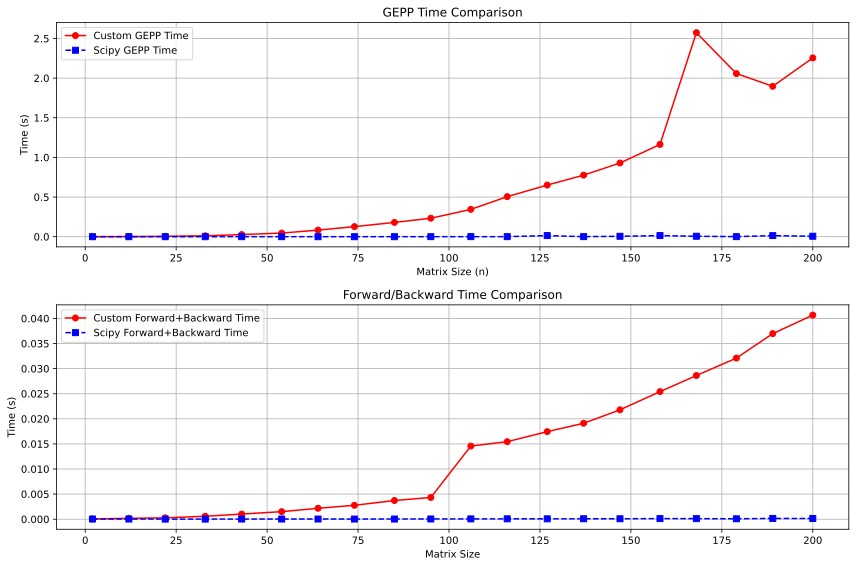

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(sizes, list(gepp_times.values()), marker='o', linestyle='-', label='Custom GEPP Time', color='red')
plt.plot(sizes, list(scipy_gepp_times.values()), marker='s', linestyle='--', label='Scipy GEPP Time', color='blue')
plt.title('GEPP Time Comparison')
plt.xlabel('Matrix Size (n)')
plt.ylabel('Time (s)')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(sizes, list(forward_backward_times.values()), marker='o', linestyle='-', label='Custom Forward+Backward Time', color='red')
plt.plot(sizes, list(scipy_forward_backward_times.values()), marker='s', linestyle='--', label='Scipy Forward+Backward Time', color='blue')
plt.title('Forward/Backward Time Comparison')
plt.xlabel('Matrix Size')
plt.ylabel('Time (s)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
custom_data = {'Size': sizes, 'GEPP Time (Custom)': list(gepp_times.values()), 'Forward+Backward Time (Custom)': list(forward_backward_times.values())}
scipy_data = {'Size': sizes, 'GEPP Time (Scipy)': list(scipy_gepp_times.values()), 'Forward+Backward Time (Scipy)': list(scipy_forward_backward_times.values())}

custom_df = pd.DataFrame(custom_data)
scipy_df = pd.DataFrame(scipy_data)

result_df = pd.merge(custom_df, scipy_df, on='Size')

table = tabulate(result_df, headers='keys', tablefmt='pretty', showindex=False)

print(table)


+-------+-----------------------+--------------------------------+------------------------+-------------------------------+
| Size  |  GEPP Time (Custom)   | Forward+Backward Time (Custom) |   GEPP Time (Scipy)    | Forward+Backward Time (Scipy) |
+-------+-----------------------+--------------------------------+------------------------+-------------------------------+
|  2.0  | 0.0005185604095458984 |     4.696846008300781e-05      | 9.036064147949219e-05  |     3.24249267578125e-05      |
| 12.0  | 0.0016796588897705078 |     0.00016641616821289062     | 5.173683166503906e-05  |    2.5272369384765625e-05     |
| 22.0  | 0.004578828811645508  |     0.00027060508728027344     |   4.57763671875e-05    |     1.811981201171875e-05     |
| 33.0  | 0.011593341827392578  |     0.0005834102630615234      | 7.772445678710938e-05  |     2.002716064453125e-05     |
| 43.0  | 0.026630401611328125  |     0.0010178089141845703      | 0.00010204315185546875 |    2.6464462280273438e-05     |
| 54.0  

## Converting it to pdf

In [191]:
!jupyter nbconvert --to pdf Linear_Algebra_and_its_Applications.ipynb

[NbConvertApp] Converting notebook Linear_Algebra_and_its_Applications.ipynb to pdf
[NbConvertApp] Support files will be in Linear_Algebra_and_its_Applications_files/
[NbConvertApp] Making directory ./Linear_Algebra_and_its_Applications_files
[NbConvertApp] Making directory ./Linear_Algebra_and_its_Applications_files
[NbConvertApp] Making directory ./Linear_Algebra_and_its_Applications_files
[NbConvertApp] Making directory ./Linear_Algebra_and_its_Applications_files
[NbConvertApp] Writing 72939 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 105785 bytes to Linear_Algebra_and_its_Applications.pdf
